# Exploratory Data Analysis

In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if(pd.notna(skills)) else skills)

##### Job Locations Explored:

In [2]:
df['job_location'] = df['job_location'].replace('United States', 'Anywhere')

In [3]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

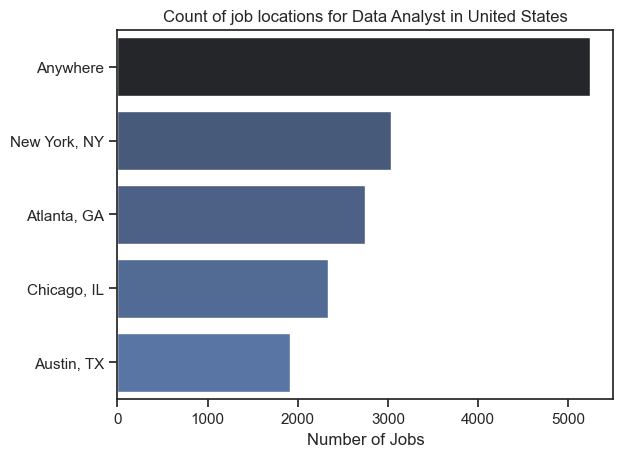

In [4]:
df_loc = df_DA_US['job_location'].value_counts().head(5).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_loc, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)

plt.title('Count of job locations for Data Analyst in United States')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

##### Job Opportunities:


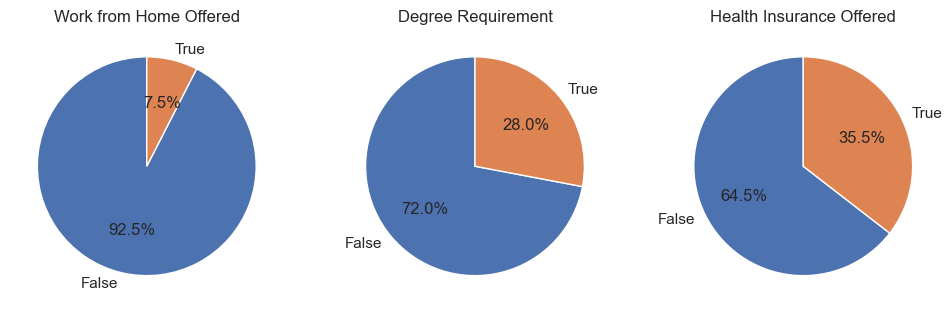

In [5]:
fig,ax = plt.subplots(1,3)

list = ['job_work_from_home','job_no_degree_mention','job_health_insurance']
titleList = ['Work from Home Offered','Degree Requirement', 'Health Insurance Offered']

for i,j in enumerate(list):
    df_DA_US[j].value_counts().plot(kind='pie', ax=ax[i], startangle=90, autopct='%1.1f%%')
    ax[i].set_title(titleList[i])
    ax[i].set_ylabel("")

fig.set_size_inches((12,5))


##### Companies Explored:

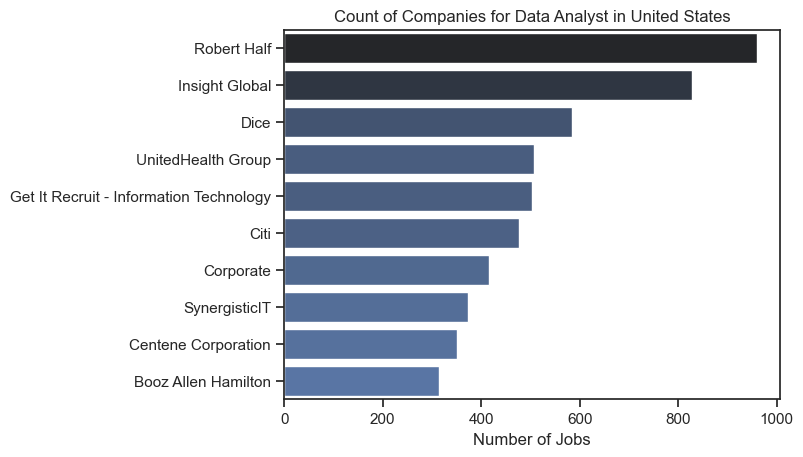

In [6]:
df_loc = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_loc, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)

plt.title('Count of Companies for Data Analyst in United States')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()